# Demo of the NFLAM package

In the following we will demonstrate the NFLAM package. It is currently capable of doing impressive things:

In [1]:
import NFLAM

import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

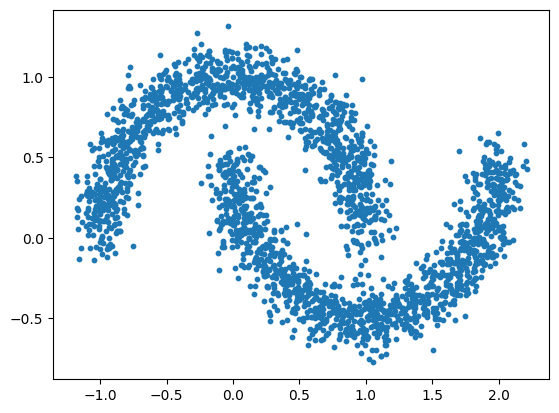

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10)

In [4]:
LAM = NFLAM.NFLAM(data)

Epoch 1 | Loss: 2.4762: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]
h:\Uni\Master\Thesis\NFLAM\NFLAM\.venv\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
H:\Uni\Master\Thesis\NFLAM\NFLAM\NFLAM\NFLAM\NFLAM.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  self.cov_matrices = torch.tensor(self.cov_matrices, dtype=torch.float32).to(self.device)
H:\Uni\Master\Thesis\NFLAM\NFLAM\NFLAM\NFLAM\NFLAM.py:98: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a 

In [5]:
point1 = torch.tensor([[1.5, 0.0]], dtype=torch.float32)
point2 = torch.tensor([[-1.5, 0.0]], dtype=torch.float32)

LAM.distance(point1, point2)

17576 13870


IndexError: index 17576 is out of bounds for dimension 0 with size 17576

In [ ]:
# ???????????????